# Topic Modeling Using Year 2017

### Imports

In [71]:
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup
import time
from random import randint
from pymongo import MongoClient
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import NMF, TruncatedSVD
import modules.modeling_module as mm
from spacy.en import STOP_WORDS as stopwords
import string
import spacy
import numpy as np
nlp = spacy.load('en')
stopwords.update(['et', 'al', "'s", "—", '-'])
punctuations = string.punctuation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

### Connect to MongoDB

In [2]:
client = MongoClient()
sci = client.metis_p4_db.science

In [3]:
year_2017 = sci.find({'year': 2017})

In [4]:
year_2017[0]

{'_id': ObjectId('59ff7729127ab46797dafb56'),
 'description': 'Producing mass quantities of chemicals has its roots in the industrial revolution. But industrial synthesis leads to sizeable sustainability and socioeconomic challenges. The rapid advances in biotechnology suggest that biological manufacturing may soon be a feasible alternative, but can it produce chemicals at scale? Clomburg et al. review the progress made in industrial biomanufacturing, including the tradeoffs between highly tunable biocatalysts and units of scale. The biological conversion of single-carbon compounds such as methane, for example, has served as a testbed for more sustainable, decentralized production of desirable compounds.',
 'title': 'Industrial biomanufacturing: The future of chemical production',
 'year': 2017}

In [5]:
all_descriptions = []

for record in year_2017:
    all_descriptions.append(record['description'])

In [6]:
all_descriptions[:2]

['Producing mass quantities of chemicals has its roots in the industrial revolution. But industrial synthesis leads to sizeable sustainability and socioeconomic challenges. The rapid advances in biotechnology suggest that biological manufacturing may soon be a feasible alternative, but can it produce chemicals at scale? Clomburg et al. review the progress made in industrial biomanufacturing, including the tradeoffs between highly tunable biocatalysts and units of scale. The biological conversion of single-carbon compounds such as methane, for example, has served as a testbed for more sustainable, decentralized production of desirable compounds.',
 'The human genome generates many thousands of long noncoding RNAs (lncRNAs). A very small number of lncRNAs have been shown to be functional. Liu et al. carried out a large-scale CRISPR-based screen to assess the function of ∼17,000 lncRNAs in seven different human cell lines. A considerable number (∼500) of the tested lncRNAs influenced cell

In [10]:
len(all_descriptions)

1492

#### Write function for tokenizer

In [8]:
def spacy_tokenizer_3(doc):
    """
    A tokenizer called during vectorization

    INPUT:
    doc - the text to be tokenized

    OUTPUT:
    Tokenized text with the appropriate numbers removed
    """ 
    doc = doc.replace('—', '').replace(',', '').replace("'s", '')
    # doc = re.sub('\s\d+(\s)?(,)?', ' ', doc)
    doc = re.sub('\D\d+(\D)?', ' ', doc)
    doc = doc.replace('–', '')
    tokens = nlp(doc)
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]     
    return tokens

# Make different vectorizers and test models (LSA, NMF, LDA)

#### Start with tokenizer 3 as this is the best tokenizer for cleaning data

In [9]:
cv_vect1, cv_vect1_transformed = mm.count_vectorizer(spacy_tokenizer_3, 5000, all_descriptions)

In [10]:
mm.use_vectorizer(cv_vect1, cv_vect1_transformed)



-------LSA------


Topic  0
cell use researcher new science human material protein study year
Topic  1
offer instrumentation newly offer roundup information roundup laboratory material apparatus laboratory material potential weekly information newly potential interest
Topic  2
cell protein gene cancer dna mouse function structure chromosome perspective
Topic  3
cell science research scientist u.s new world cancer president researcher
Topic  4
human dna new gene year disease genome modern researcher specie
Topic  5
protein dna science structure complex bind chromosome research scientist sequence
Topic  6
change climate carbon protein climate change c year global plant long
Topic  7
cancer drug protein disease patient tumor therapy carbon target change
Topic  8
dna use science human change genome climate carbon gene chromosome
Topic  9
carbon use dna new plant researcher c year bond protein


-------NMF------


Topic  0
science research scientist u.s world new president scientific trum

count vectorizer 2

In [11]:
cv_vect2, cv_vect2_transformed = mm.count_vectorizer(spacy_tokenizer_3, 5000, all_descriptions, ngram_stop=4)

In [12]:
mm.use_vectorizer(cv_vect2, cv_vect2_transformed)



-------LSA------


Topic  0
cell use new science human researcher protein study year material
Topic  1
laboratory material apparatus laboratory material potential potential interest researcher roundup information newly offer roundup information newly roundup information offer instrumentation apparatus laboratory offer instrumentation apparatus offer instrumentation information newly offer instrumentation
Topic  2
cell protein gene cancer dna mouse function chromosome structure perspective
Topic  3
cell science research scientist u.s new world president cancer researcher
Topic  4
human dna new gene year disease genome modern specie researcher
Topic  5
protein dna science structure complex bind chromosome research sequence scientist
Topic  6
change climate carbon protein climate change c year global plant atmosphere
Topic  7
cancer drug disease protein patient tumor carbon therapy vaccine target
Topic  8
dna use science human change genome carbon climate gene chromosome
Topic  9
carbon

count vectorizer 3

In [13]:
cv_vect3, cv_vect3_transformed = mm.count_vectorizer(spacy_tokenizer_3, 110000, all_descriptions)

In [14]:
mm.use_vectorizer(cv_vect3, cv_vect3_transformed)



-------LSA------


Topic  0
material researcher information potential offer interest laboratory newly apparatus instrumentation
Topic  1
cell use human new protein science study year gene change
Topic  2
cell protein cancer gene mouse t immune stem cell t cell stem
Topic  3
science cell research scientist u.s new world president trump national
Topic  4
human dna gene protein genome new disease year modern neandertal
Topic  5
protein science dna structure complex bind research chromosome scientist u.s
Topic  6
cancer drug protein patient tumor therapy disease target pd c
Topic  7
change climate carbon protein c climate change plant year atmosphere global
Topic  8
dna use science carbon gene genome cancer change chromosome c
Topic  9
new carbon dna year researcher use plant c reaction study


-------NMF------


Topic  0
material researcher information potential offer interest laboratory newly apparatus instrumentation
Topic  1
new year researcher study scientist million world work time

### Lets try tfidf vectorizer to compare
tfidf vectorizer 1

In [15]:
tf_vect1, tf_vect1_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 5000, all_descriptions)

#### The following NMF model did well!

In [16]:
mm.use_vectorizer(tf_vect1, tf_vect1_transformed)



-------LSA------


Topic  0
apparatus laboratory material potential weekly roundup laboratory material roundup newly offer information newly offer instrumentation instrumentation apparatus interest researcher
Topic  1
cell science human new use protein research study year change
Topic  2
cell protein dna gene chromosome cancer structure function mouse expression
Topic  3
cell science cancer research gene patient u.s stem cell stem scientist
Topic  4
dna human genome neandertal modern ancient protein gene sequence specie
Topic  5
dna protein science structure chromosome research bind quantum nucleosome u.s
Topic  6
carbon climate c change plant dna cell protein climate change emission
Topic  7
cancer protein drug vaccine patient tumor carbon disease bond therapy
Topic  8
dna cancer neandertal carbon cell ancient solar year hydrogen genome
Topic  9
dna cancer chromosome quantum change tumor genome nucleosome histone epigenetic


-------NMF------


Topic  0
offer instrumentation potenti

tfidf vectorizer 2

In [17]:
tf_vect2, tf_vect2_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 5000, all_descriptions, ngram_stop=4)

In [18]:
mm.use_vectorizer(tf_vect2, tf_vect2_transformed)



-------LSA------


Topic  0
offer instrumentation apparatus roundup information newly information newly offer instrumentation information newly offer information newly potential interest potential interest researcher newly offer instrumentation apparatus newly offer instrumentation newly offer
Topic  1
cell science human use new protein research study year change
Topic  2
cell protein dna gene structure chromosome cancer function mouse expression
Topic  3
cell science cancer gene research patient u.s stem cell stem scientist
Topic  4
human dna genome neandertal modern ancient specie gene sequence year
Topic  5
dna protein science structure chromosome bind nucleosome complex strand research
Topic  6
carbon climate c plant protein dna change cell climate change bond
Topic  7
cancer drug protein vaccine patient tumor disease bond trial carbon
Topic  8
dna cancer neandertal carbon cell hydrogen solar ancient year genome
Topic  9
dna cancer chromosome quantum change tumor patient genome n

tfidf vectorizer 3

In [19]:
tf_vect3, tf_vect3_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 110000, all_descriptions)

In [20]:
mm.use_vectorizer(tf_vect3, tf_vect3_transformed)



-------LSA------


Topic  0
offer instrumentation potential interest material potential interest researcher roundup information roundup weekly laboratory material weekly roundup instrumentation apparatus
Topic  1
cell protein science human use new cancer study dna gene
Topic  2
cell protein cancer pd t cell t gene immune mouse tumor
Topic  3
pd cancer science cell t cell therapy t research patient tumor
Topic  4
pd c carbon t cell t therapy quantum cancer tcr pd therapy
Topic  5
cell science perovskite stem cell quantum solar cell stem material solar research
Topic  6
dna histone science nucleosome epigenetic silence trump chromosome replication pd
Topic  7
carbon cell climate plant change c atmosphere soil specie climate change
Topic  8
quantum cancer gene neandertal spin particle epigenetic histone hole state
Topic  9
neandertal dna black hole hole modern modern human black ancient protein ancestor


-------NMF------


Topic  0
interest researcher roundup offer instrumentation pote

#### Try tokenizer 1 to compare

In [23]:
cv_vect1, cv_vect1_transformed = mm.count_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions)

In [24]:
mm.use_vectorizer(cv_vect1, cv_vect1_transformed)



-------LSA------


Topic  0
cell use researcher new science human material protein study potential
Topic  1
instrumentation apparatus potential interest laboratory material newly offer offer instrumentation information newly weekly material potential apparatus laboratory weekly roundup
Topic  2
cell protein gene cancer mouse dna function chromosome structure perspective
Topic  3
cell science research scientist new u.s world president cancer researcher
Topic  4
human dna new gene disease genome modern specie researcher neandertal
Topic  5
protein dna science structure bind complex chromosome research sequence enzyme
Topic  6
change climate 1 issue pageof pageof issue 2 protein carbon climate change
Topic  7
cancer disease drug 1 protein patient issue pageof issue pageof vaccine
Topic  8
human issue science 1 pageof pageof issue quantum material 2 3
Topic  9
use science dna cancer carbon change human genome issue chromosome


-------NMF------


Topic  0
use material quantum light energ

In [25]:
cv_vect2, cv_vect2_transformed = mm.count_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions, ngram_stop=4)

In [26]:
mm.use_vectorizer(cv_vect2, cv_vect2_transformed)



-------LSA------


Topic  0
cell use new science human researcher protein study material 1
Topic  1
newly offer instrumentation offer instrumentation apparatus newly offer instrumentation apparatus weekly roundup information newly information newly information newly offer information newly offer instrumentation newly offer weekly roundup information weekly roundup
Topic  2
cell protein gene cancer mouse dna function chromosome structure perspective
Topic  3
cell science research scientist new u.s world president cancer trump
Topic  4
human dna new gene disease genome modern specie researcher neandertal
Topic  5
protein dna science structure bind complex chromosome research sequence enzyme
Topic  6
change climate 1 issue pageof pageof issue 2 protein carbon climate change
Topic  7
dna change climate carbon cell genome plant chromosome gene use
Topic  8
protein carbon change climate cancer drug help patient study disease
Topic  9
use science cancer dna carbon human change issue 1 drug


In [27]:
cv_vect3, cv_vect3_transformed = mm.count_vectorizer(mm.spacy_tokenizer_1, 110000, all_descriptions)

In [28]:
mm.use_vectorizer(cv_vect3, cv_vect3_transformed)



-------LSA------


Topic  0
material researcher information potential offer interest laboratory newly apparatus instrumentation
Topic  1
cell use human protein new science study 1 change gene
Topic  2
cell protein cancer gene t mouse immune stem cell t cell stem
Topic  3
science cell research scientist new u.s world president trump researcher
Topic  4
human dna gene genome disease protein new cancer modern researcher
Topic  5
protein dna science structure bind complex chromosome research scientist nucleosome
Topic  6
cancer use drug patient tumor therapy trial treatment disease vaccine
Topic  7
use dna human new gene genome quantum researcher cell neandertal
Topic  8
carbon change dna climate plant use protein perspective co2 atmosphere
Topic  9
dna science cancer use issue 1 chromosome gene genome pageof issue


-------NMF------


Topic  0
material researcher information potential offer interest laboratory newly apparatus instrumentation
Topic  1
cell stem stem cell gene immune mous

### Lets try tfidf vectorizer with tokenizer 1 to compare
tfidf vectorizer 1

In [29]:
tf_vect1, tf_vect1_transformed = mm.tfidf_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions)

#### The following NMF model did well!

In [30]:
mm.use_vectorizer(tf_vect1, tf_vect1_transformed)



-------LSA------


Topic  0
potential interest laboratory material information newly apparatus laboratory instrumentation apparatus weekly roundup newly offer weekly offer instrumentation material potential
Topic  1
cell science use human new protein study research change scientist
Topic  2
cell protein dna gene chromosome structure cancer function mouse expression
Topic  3
cell science cancer research u.s gene patient stem cell stem scientist
Topic  4
dna human genome neandertal modern ancient gene protein sequence chromosome
Topic  5
dna protein science chromosome structure bind research nucleosome strand histone
Topic  6
carbon climate cell change plant co2 climate change dna emission atmosphere
Topic  7
cancer protein carbon drug bond vaccine patient tumor reaction disease
Topic  8
protein brain neuron structure quantum function state memory behavior 1
Topic  9
dna quantum cancer chromosome change climate histone epigenetic nucleosome tumor


-------NMF------


Topic  0
weekly ro

tfidf vectorizer 2

In [31]:
tf_vect2, tf_vect2_transformed = mm.tfidf_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions, ngram_stop=4)

In [32]:
mm.use_vectorizer(tf_vect2, tf_vect2_transformed)



-------LSA------


Topic  0
offer instrumentation roundup information newly offer information newly offer instrumentation interest researcher laboratory material potential information newly offer roundup information information newly roundup information newly weekly
Topic  1
cell science use human new protein study research change dna
Topic  2
cell protein dna gene chromosome structure cancer function mouse expression
Topic  3
cell science cancer research gene u.s patient stem cell stem scientist
Topic  4
dna human genome neandertal modern ancient gene sequence specie protein
Topic  5
dna protein science chromosome structure bind nucleosome strand histone research
Topic  6
carbon climate cell change plant co2 climate change dna emission atmosphere
Topic  7
cancer protein carbon drug vaccine bond patient disease tumor reaction
Topic  8
protein brain neuron quantum structure state memory behavior function 1
Topic  9
dna cancer quantum chromosome change tumor climate histone epigenetic 

tfidf vectorizer 3

In [33]:
tf_vect3, tf_vect3_transformed = mm.tfidf_vectorizer(mm.spacy_tokenizer_1, 110000, all_descriptions)

In [34]:
mm.use_vectorizer(tf_vect3, tf_vect3_transformed)



-------LSA------


Topic  0
offer instrumentation interest researcher information newly roundup information weekly roundup roundup newly offer weekly material potential apparatus laboratory
Topic  1
cell protein use human science new cancer dna study gene
Topic  2
cell protein cancer t cell t pd-1 cd28 gene immune mouse
Topic  3
science cancer pd-1 cd28 cell t cell t research therapy u.s
Topic  4
pd-1 cd28 carbon t cell t cancer quantum therapy tcr pd-1 therapy
Topic  5
dna pd-1 cd28 human genome neandertal cancer histone sequence gene
Topic  6
dna science histone quantum nucleosome epigenetic silence trump replication president
Topic  7
carbon climate plant cell change atmosphere co2 soil climate change specie
Topic  8
quantum neandertal gene cancer human spin modern particle hole state
Topic  9
neandertal dna modern modern human black hole hole black ancient cell protein


-------NMF------


Topic  0
roundup information weekly material potential potential interest interest research

# This is the best model and its topics (NMF best)

In [35]:
tf_vect1, tf_vect1_transformed = mm.tfidf_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions)

In [36]:
mm.use_vectorizer(tf_vect1, tf_vect1_transformed)



-------LSA------


Topic  0
potential interest laboratory material information newly apparatus laboratory instrumentation apparatus weekly roundup newly offer weekly offer instrumentation material potential
Topic  1
cell science use human new protein study research change scientist
Topic  2
cell protein dna gene chromosome structure cancer function mouse expression
Topic  3
cell science cancer research u.s gene patient stem cell stem scientist
Topic  4
dna human genome neandertal modern ancient gene protein sequence chromosome
Topic  5
dna protein science chromosome structure bind research nucleosome strand histone
Topic  6
carbon climate cell change plant co2 climate change dna emission atmosphere
Topic  7
cancer protein carbon drug bond vaccine patient tumor reaction disease
Topic  8
protein brain neuron structure quantum function state memory behavior 1
Topic  9
dna quantum cancer chromosome change climate histone epigenetic nucleosome tumor


-------NMF------


Topic  0
weekly ro

# Try more topics

In [37]:
mm.use_vectorizer(tf_vect1, tf_vect1_transformed, n_comp=18)



-------LSA------


Topic  0
material potential offer instrumentation instrumentation apparatus roundup information roundup apparatus laboratory weekly potential interest information newly interest researcher
Topic  1
cell science use human new protein study research change scientist
Topic  2
cell protein dna gene chromosome structure cancer function mouse expression
Topic  3
cell science cancer research u.s gene patient stem cell stem scientist
Topic  4
dna human genome neandertal modern gene ancient protein sequence chromosome
Topic  5
dna protein science structure chromosome research bind nucleosome strand quantum
Topic  6
carbon climate cell change plant co2 climate change chromosome emission atmosphere
Topic  7
cancer protein carbon drug bond vaccine patient reaction tumor disease
Topic  8
brain protein neuron memory function structure behavior research circuit breathing
Topic  9
chromosome quantum dna cancer change climate genome state brain memory
Topic  10
bond carbon catalyst

In [60]:
tf_vect1, tf_vect1_transformed = mm.tfidf_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions)
norm = Normalizer()
vect_normalized = norm.fit_transform(tf_vect1_transformed)
model, model_transformed = mm.nmf_tfidf(vect_normalized, n_comp=10)

### Try t-sne

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1492 samples in 0.001s...
[t-SNE] Computed neighbors for 1492 samples in 0.090s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1492
[t-SNE] Computed conditional probabilities for sample 1492 / 1492
[t-SNE] Mean sigma: 0.026322
[t-SNE] Computed conditional probabilities in 0.106s
[t-SNE] Iteration 50: error = 65.9576721, gradient norm = 0.1439155 (50 iterations in 2.457s)
[t-SNE] Iteration 100: error = 60.1102142, gradient norm = 0.0203910 (50 iterations in 1.804s)
[t-SNE] Iteration 150: error = 59.9849548, gradient norm = 0.0166529 (50 iterations in 1.838s)
[t-SNE] Iteration 200: error = 59.9553261, gradient norm = 0.0206226 (50 iterations in 2.648s)
[t-SNE] Iteration 250: error = 59.9425240, gradient norm = 0.0189166 (50 iterations in 2.167s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.942524
[t-SNE] Iteration 300: error = 0.7042003, gradient norm = 0.0005841 (50 iterations in 1.738s

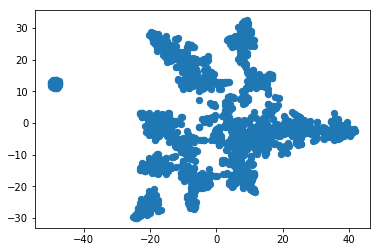

In [45]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

tsne_model = TSNE(n_components=2, random_state=0,verbose=2, perplexity=50)
low_data = tsne_model.fit_transform(model_transformed)

x,y = zip(*low_data)
plt.scatter(x, y, s=40);

# Examine topics and print relevant documents for each topic

In [44]:
def sort_papers_to_topics(num_topics, model_transformed):
    """
    Makes a dictionary with topics as keys and the index and vectorized values as values
    
    INPUT:
    num_topics - the number of topics desired
    model_transformed - the model used for topic modeling
    
    OUTPUT:
    topic_dict - a dictionary of topics and values
    """
    topic_dict = {}
    for topic in range(num_topics):
        topic_dict[topic] = []
    for index, item in enumerate(model_transformed):
        topic_num = np.argmax(item)
        topic_dict[topic_num].append([index, item])
    return topic_dict

In [45]:
papers_and_topics = sort_papers_to_topics(10, model_transformed)

In [57]:
papers_and_topics

{0: [[16, array([ 0.3884037,  0.       ,  0.       ,  0.       ,  0.       ,
           0.       ,  0.       ,  0.       ,  0.       ,  0.       ])],
  [48, array([ 0.3884037,  0.       ,  0.       ,  0.       ,  0.       ,
           0.       ,  0.       ,  0.       ,  0.       ,  0.       ])],
  [80, array([ 0.3884037,  0.       ,  0.       ,  0.       ,  0.       ,
           0.       ,  0.       ,  0.       ,  0.       ,  0.       ])],
  [115, array([ 0.3884037,  0.       ,  0.       ,  0.       ,  0.       ,
           0.       ,  0.       ,  0.       ,  0.       ,  0.       ])],
  [150, array([ 0.3884037,  0.       ,  0.       ,  0.       ,  0.       ,
           0.       ,  0.       ,  0.       ,  0.       ,  0.       ])],
  [181, array([ 0.3884037,  0.       ,  0.       ,  0.       ,  0.       ,
           0.       ,  0.       ,  0.       ,  0.       ,  0.       ])],
  [224, array([ 0.3884037,  0.       ,  0.       ,  0.       ,  0.       ,
           0.       ,  0.       ,  0.

In [46]:
from collections import Counter
def print_papers(topic_dict, topic_number):
    """
    A function to return the documents corresponding to each topic
    
    INPUTS:
    topic_dict - a dictionary of topics and their index and values after transforming with the model
    topic_number - the topic number where examples should be printed out
    """
    topic_counts = []
    for item in topic_dict[topic_number]:
        doc_index = item[0]
        doc = all_descriptions[doc_index]
        topic_counts.append(doc)
    return topic_counts

In [47]:
counts = print_papers(papers_and_topics, 0)
Counter(counts).most_common(5)

[('A weekly roundup of information on newly offered instrumentation, apparatus, and laboratory materials of potential interest to researchers.',
  43)]

In [48]:
counts = print_papers(papers_and_topics, 1)
Counter(counts).most_common(5)

[('The Casparian strip provides a waterproofing function to plant roots, protecting them against unregulated influxes of water and minerals. The integrity of the Casparian strip depends on a receptor-like kinase. Doblas et al. and Nakayama et al. now identify the peptide ligands in the core of the root (the stele) that help regulate Casparian strip formation. The receptor is expressed on the outward-facing surface of the root endodermal cells that surround the stele. When the endodermal layer is sealed by the Casparian strip, the peptide ligands cannot reach their receptors. When the endodermal layer is breached, whether by damage or during development, the peptides reach their receptors and activate signaling that encourages lignin deposition, shoring up the strips.',
  2),
 ('Most bacteria are protected by peptidoglycan cell walls, which must be remodeled to split the cell. Cell division requires the tubulin homolog FtsZ, a highly conserved cytoskeletal polymer that specifies the fut

In [49]:
counts = print_papers(papers_and_topics, 2)
Counter(counts).most_common(5)

[("Nine months since the British vote to exit the European Union (“Brexit”), the UK science community's initial dismay has given way to hard-boiled determination to limit the damage it will do to universities and research. On 29 March, Prime Minister Theresa May is expected to give formal notification of the UK's intention to withdraw under Article 50 of the Lisbon Treaty, the constitutional basis of the EU. This will set in motion a 2-year period of intense negotiation on the terms of the UK's divorce, and any future agreements with the EU—with research just one line item on a long list of issues to be resolved.",
  2),
 ('In science news around the world, the San people of Southern Africa release a code of ethics to guide researchers wanting to study their culture or genes, a series of films documenting nuclear tests from the 1945 to 1962 is released on YouTube, U.K. regulators grant the first license for mitochondrial replacement therapy, a researcher is accused of putting his name 

In [50]:
counts = print_papers(papers_and_topics, 3)
Counter(counts).most_common(5)

[('Two-dimensional Ruddlesden-Popper perovskites form quantum wells by sandwiching inorganic-organic perovskite layers used in photovoltaic devices between organic layers. Blancon et al. show that if the perovskite layer is more than two unit cells thick, photogenerated excitons undergo an unusual but highly efficient process for creating free carriers that can be harvested in photovoltaic devices (see the Perspective by Bakr and Mohammed). Lower-energy local states at the edges of the perovskite layer facilitate dissociation into electrons and holes that are well protected from recombination.',
  2),
 ("The Hall-Petch relationship links a metal's increasing hardness with decreasing grain size, but it breaks down when grains become very small. This is unfortunate because nanograined metals could otherwise be extremely hard. Hu et al. found a way to circumvent this problem in a set of nickel-molybdenum alloys. They altered the molybdenum composition and annealed the samples at just the 

In [51]:
counts = print_papers(papers_and_topics, 4)
Counter(counts).most_common(5)

[('Sometimes “you” is used when addressing another person, but in many\n                    situations, “you” is used to indicate anyone or\n                    everyone—the generic “you.” Orvell et al.\n                    studied the underlying psychological function of the generic\n                    “you.” When asked to write about a past negative experience,\n                    people were more likely to distance themselves and derive meaning from the\n                    experience if tasked with using the generic “you” rather than the\n                    first-person pronoun “I.”',
  2),
 ('Dengue virus (DENV) causes a large number of asymptomatic infections, so surveillance captures only a fraction of cases. Salje et al. developed a method for identifying the number of transmission chains of DENV from sequence data and serology. They found that sequential transmission of DENV typically occurs between households in the same neighborhood. Within high-density urban localities, 

In [52]:
counts = print_papers(papers_and_topics, 5)
Counter(counts).most_common(5)

[("Cell fate decisions require a gene's transcriptional status, whether on or off, to be stably and heritably maintained over multiple cell generations. For silenced genes, heterochromatin domains are associated with specific histone posttranslational modifications, and these histone marks are maintained during DNA replication and chromosome duplication (see the Perspective by De and Kassis). Laprell et al. show that parental methylated histone H3 lysine 27 (H3K27) nucleosomes in Drosophila are inherited in daughter cells after replication and can repress transcription, but that they are not sufficient to propagate the mark. Trimethylation of newly incorporated nucleosomes requires recruitment of the methyltransferase Polycomb repressive complex 2 (PRC2) to neighboring cis-regulatory DNA elements. Coleman and Struhl demonstrate that H3K27 trimethylated nucleosomes play a causal role in transmitting epigenetic memory at a Drosophila HOX gene through anchoring of PRC2 at the Polycomb res

In [53]:
counts = print_papers(papers_and_topics, 6)
Counter(counts).most_common(5)

[('The hydrogenation of carbon dioxide is a key step in the industrial production of methanol. Catalysts made from copper (Cu) and zinc oxide (ZnO) on alumina supports are often used. However, the actual active sites for this reaction—Zn-Cu bimetallic sites or ZnO-Cu interfacial sites—are debated. Kattel et al. studied model catalysts and found that ZnCu became as active as ZnO/Cu only after surface oxidation formed ZnO. Theoretical studies favor a formate intermediate pathway at a ZnO-Cu interface active site.',
  2),
 ("Although the Paris Agreement's goals (1) are aligned with science (2) and can, in principle, be technically and economically achieved (3), alarming inconsistencies remain between science-based targets and national commitments. Despite progress during the 2016 Marrakech climate negotiations, long-term goals can be trumped by political short-termism. Following the Agreement, which became international law earlier than expected, several countries published mid-century de

In [54]:
counts = print_papers(papers_and_topics, 7)
Counter(counts).most_common(5)

[('PD-1–targeted therapies have been a breakthrough for treating certain tumors and can rejuvenate T cells to unleash the anticancer immune response (see the Perspective by Clouthier and Ohashi). It is widely believed that PD-1 suppresses signaling through the T cell receptor (TCR). However, Hui et al. find instead that the TCR costimulatory receptor, CD28, is the primary target of PD-1 signaling. Independently, Kamphorst et al. show that CD28 is required for PD-1 therapies to kill cancer cells efficiently and eliminate chronic viral infections in mice. Lung cancer patients that responded to PD-1 therapy had more CD28+ T cells, which suggests that CD28 may predict treatment response.',
  4),
 ('Prostate cancer growth is fueled by male hormones called androgens. Drugs targeting the androgen receptor (AR) are initially efficacious, but most tumors eventually become resistant (see the Perspective by Kelly and Balk). Mu et al. found that prostate cancer cells escaped the effects of androge

In [55]:
counts = print_papers(papers_and_topics, 8)
Counter(counts).most_common(5)

[('Shallow magma chambers either erupt as volcanoes or solidify as intrusive magma bodies. These magma bodies are traditionally considered to be long-lived and dominated by melt. Cashman et al. review the evidence that shallow magma chambers are actually assembled quickly from much larger, crystal-rich transcrustal magmatic systems. This paradigm helps explain many geophysical and geochemical features of volcanic systems. It also presents challenges for understanding the evolution of magma and provides insight into how and why volcanoes erupt.',
  2),
 ("If the line of sight from Earth to a distant quasar passes through foreground material, some of the quasar's light is absorbed. If a galaxy-sized quantity of gas intervenes, it forms a damped Lyman α system (DLA), visible as absorption lines in the quasar spectrum. Using the Atacama Large Millimeter/Submillimeter Array, Neeleman et al. observed two quasars with known DLAs. They detected emission from gas and dust in two foreground gala

In [56]:
counts = print_papers(papers_and_topics, 9)
Counter(counts).most_common(5)

[('General activity and information processing while an animal is awake drive synapse strengthening. This is counterbalanced by weakening of synapses during sleep (see the Perspective by Acsády). De Vivo et al. used serial scanning electron microscopy to reconstruct axon-spine interface and spine head volume in the mouse brain. They observed a substantial decrease in interface size after sleep. The largest relative changes occurred among weak synapses, whereas strong ones remained stable. Diering et al. found that synapses undergo changes in synaptic glutamate receptors during the sleep-wake cycle, driven by the immediate early gene Homer1a. In awake animals, Homer1a accumulates in neurons but is excluded from synapses by high levels of noradrenaline. At the onset of sleep, noradrenaline levels decline, allowing Homer1a to move to excitatory synapses and drive synapse weakening.',
  2),
 ('The rhythmic activity of a cluster of neurons in the brainstem initiates breathing. This cluster 

In [ ]:
description = []
for item in topic_0:
    doc_index = item[0]
    doc = all_descriptions[doc_index]
    if doc not in description:
        description.append(doc)
    else:
        continue

In [ ]:
from collections import Counter
topic_0_counts = []
for item in topic_0:
    doc_index = item[0]
    doc = all_descriptions[doc_index]
    topic_0_counts.append(doc)
topic_0_counts

In [ ]:
Counter(topic_0_counts).most_common(5)

# Plot the distribution of topics for 2017

In [59]:
yearly_counts = {}
for topic in range(0,10):
    yearly_counts[topic] = 0

yearly_counts

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [61]:
# Topics 0-9 as keys and the index for each document in that topic
topic_dict = {}
for topic in range(0,10):
    topic_dict[topic] = []
for index, item in enumerate(model_transformed):
    topic_num = np.argmax(item)
    topic_dict[topic_num].append(index)

In [64]:
for topic_number in range(0,10):
    for item in topic_dict[topic_number]:
        doc_index = item
        # print(doc_index, doc)
        yearly_counts[topic_number] += 1

In [65]:
yearly_counts

{0: 43, 1: 84, 2: 281, 3: 261, 4: 239, 5: 130, 6: 128, 7: 112, 8: 123, 9: 91}

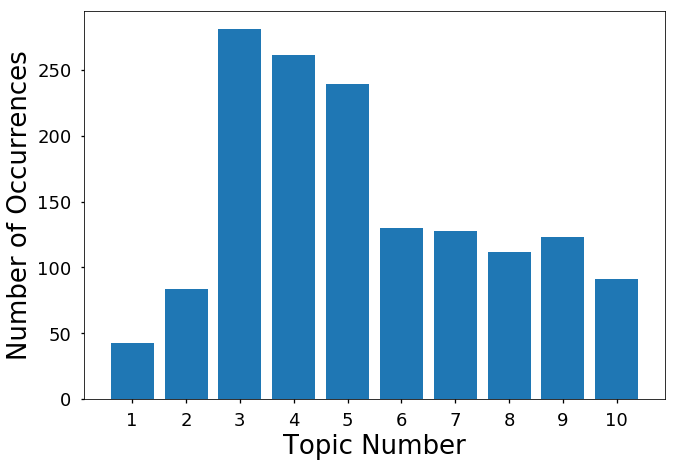

In [79]:
plot = plt.bar(range(len(yearly_counts)), yearly_counts.values(), align='center')
plt.xticks(range(len(yearly_counts)), range(1,11), fontsize=18)
plt.xlabel('Topic Number', fontsize=26)
plt.ylabel('Number of Occurrences', fontsize=26)
plt.yticks(fontsize=18)
#plot[2].set_color('r')
#plot[3].set_color('r')
#plot[4].set_color('r')
save_path = '/Users/murdock/Documents/metis/project4/2017_topics.png'
plt.savefig(save_path, bbox_inches='tight');